## 타이타닉 생존자 데이터 EDA(Exploratory Data Analysis)

In [1]:
import pandas as pd

fname = 'train.csv'

data = pd.read_csv(fname)

In [2]:
# len(data)
data.shape

(891, 12)

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

- `PassengerId`: serial ID
- `Survived`: 1=survived, 0=didn't survive
- `Pclass`: passenger class (1, 2, or 3)
- `Name`: full name of the passenger
- `Sex`: male or female
- `Age`: age in years
- `SibSp`: # of siblings or spouses aboard the Titanic
- `Parch`: # of parents of children aboard the Titanic
- `Ticket`: ticket number
- `Fare`: passenger fare
- `Cabin`: cabin number
- `Embarked`: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
# data.count()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.info()

In [5]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

In [6]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
survivied_label = 'Survived'
data[survivied_label].value_counts() * 100 / len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [8]:
data.Survived.value_counts() / len(data) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [9]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:>

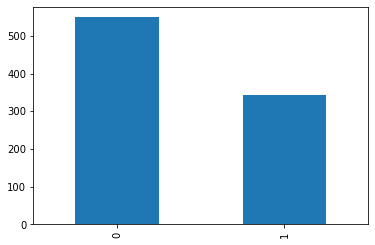

In [11]:
%matplotlib inline

alpha_color = 0.5

data['Survived'].value_counts().plot(kind='bar')

In [12]:
data['Sex'].value_counts().plot(kind='bar',
                                color=['b', 'r'],
                                alpha=alpha_color)

<AxesSubplot:>

In [14]:
data['Pclass'].value_counts().sort_index().plot(kind='bar',
                                                alpha=alpha_color)

<AxesSubplot:>

In [15]:
data.plot(kind='scatter', x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

<AxesSubplot:>

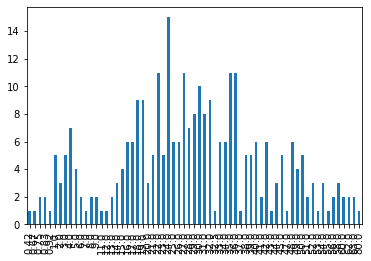

In [16]:
data.loc[data['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')

In [17]:
bins = [0, 10, 20, 40, 80]

data['AgeBin'] = pd.cut(data['Age'], bins)

In [18]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked    AgeBin  
0      0         A/5 21171   7.2500   NaN        S  (20, 40]  
1      0          PC 17599  71.2833   C85        C  (20, 40]  
2      0  STON/O2. 3101282   7.9250   NaN        S  (20, 40]  
3      0            113803  53.1000  C123        S  (20, 40]  
4      0            373450   8.0500   NaN        S  (20, 40]

<AxesSubplot:>

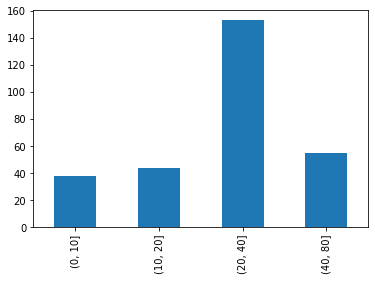

In [19]:
data[data['Survived'] == 1]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

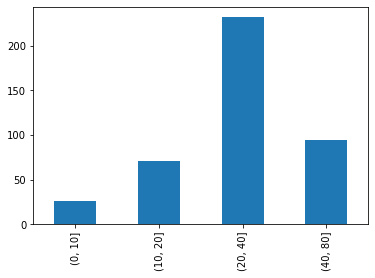

In [20]:
data[data['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

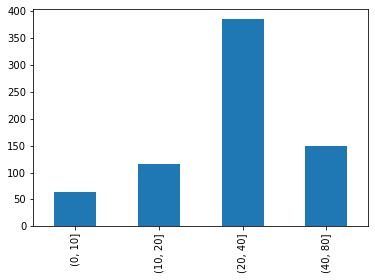

In [21]:
data['AgeBin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

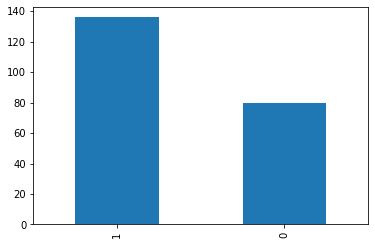

In [22]:
data.loc[data['Pclass'] == 1]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

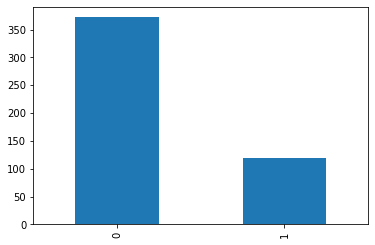

In [23]:
data[data['Pclass'] == 3]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

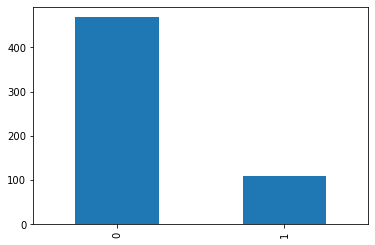

In [24]:
data[data['Sex'] == 'male']['Survived'].value_counts().plot(kind='bar')

In [25]:
data[data['Sex'] == 'female']['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

<AxesSubplot:>

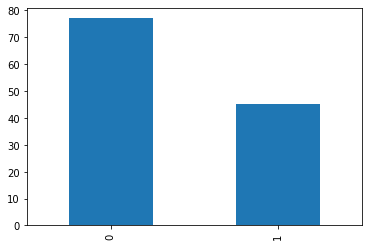

In [26]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

In [27]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

In [28]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

In [29]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>